## Different forward models
This study has been demonstrated in the EMagPy paper [McLachlan et al. (2021)](https://doi.org/10.1016/j.cageo.2020.104561).

EMagPy proposes different `forwardModel`. Differences between CS-ECa, FSeq-ECa and LIN-ECa for a homogeneous and a heterogeneous case are illustrated below. (a) shows the differences over a homogeneous medium with increasing EC, (b) shows the differences over an increasing homogeneous medium when the device is operated at 1 m, (c) shows the differences over a heterogeneous medium with a fixed layer 1 thickness of 0.5 m and a fixed EC of 50 mS/m, and (d) shows the differences over a heterogeneous medium with a fixed layer 1 thickness of 0.5 m and a fixed EC of 50 mS/m when the device is operated at 1 m elevation. In all figures h is the device height above ground level.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src') # add path where emagpy is
from emagpy import Problem

datadir = '../src/examples/'

letters = ['a','b','c','d','e','f','g','h','i','j']

In [2]:
# parameters for the synthetic model
coils = ['VCP4.49f10000h0', 'VCP4.49f10000h1']

# homogenous ground
condsHomo = np.ones((100,2))*np.arange(100)[:,None]+1
depths = np.ones((100,1))*1

# heterogeneous ground
condsHetero = np.ones((100,2))*np.arange(100)[:,None]+1
condsHetero[:,1] = 50
depths = np.ones((100,1))*0.5

# forward modelling
k = Problem()
k.setModels([depths, depths],[condsHomo, condsHetero])
dfsFSeq = k.forward(forwardModel='FSeq', coils=coils)
dfsFSlin = k.forward(forwardModel='FSlin', coils=coils)
dfsCS = k.forward(forwardModel='CS', coils=coils)

Forward modelling
Forward modelling
Forward modelling


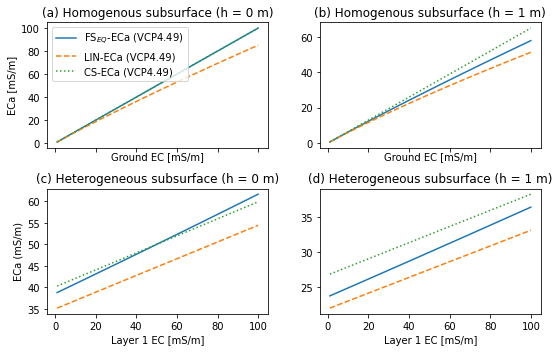

In [3]:
# figure
fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(8, 5))
axs = axs.flatten()
ax = axs[0]
ax.set_title('(a) Homogenous subsurface (h = 0 m)')
ax.plot(condsHomo[:,0], dfsFSeq[0][coils[0]], '-', label = r'FS$_{EQ}$-ECa (VCP4.49)')
ax.plot(condsHomo[:,0], dfsFSlin[0][coils[0]], '--', label = 'LIN-ECa (VCP4.49)')
ax.plot(condsHomo[:,0], dfsCS[0][coils[0]], ':', label = 'CS-ECa (VCP4.49)')
ax.set_ylabel('ECa [mS/m]')
ax.set_xlabel('Ground EC [mS/m]')
ax.legend()

ax = axs[1]
ax.set_title('(b) Homogenous subsurface (h = 1 m)')
ax.plot(condsHomo[:,0], dfsFSeq[0][coils[1]], '-')
ax.plot(condsHomo[:,0], dfsFSlin[0][coils[1]], '--')
ax.plot(condsHomo[:,0], dfsCS[0][coils[1]], ':')
ax.set_xlabel('Ground EC [mS/m]')

ax = axs[2]
ax.set_title('(c) Heterogeneous subsurface (h = 0 m)')
ax.plot(condsHetero[:,0], dfsFSeq[1][coils[0]], '-')
ax.plot(condsHetero[:,0], dfsFSlin[1][coils[0]], '--')
ax.plot(condsHetero[:,0], dfsCS[1][coils[0]], ':')
ax.set_ylabel('ECa (mS/m)') 
ax.set_xlabel('Layer 1 EC [mS/m]')

ax = axs[3]
ax.set_title('(d) Heterogeneous subsurface (h = 1 m)')
ax.plot(condsHetero[:,0], dfsFSeq[1][coils[1]], '-')
ax.plot(condsHetero[:,0], dfsFSlin[1][coils[1]], '--')
ax.plot(condsHetero[:,0], dfsCS[1][coils[1]], ':')
ax.set_xlabel('Layer 1 EC [mS/m]') 

fig.tight_layout()